In [1]:
import pandas as pd
import yfinance as yf
import datetime
from datetime import date, timedelta


In [2]:

# today = date.today()
# d1 = today.strftime("%Y-%m-%d")
# end_date = d1
# d2 = date.today() - timedelta(days=5000)
# d2 = d2.strftime("%Y-%m-%d")
# start_date = d2

stock_data = yf.download('AAPL', start='2016-01-01', end='2022-10-01')
# stock_data["Date"] = stock_data.index
stock_data.tail()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-09-26,149.660004,153.770004,149.639999,150.770004,150.083267,93339400
2022-09-27,152.740005,154.720001,149.949997,151.759995,151.068741,84442700
2022-09-28,147.639999,150.639999,144.839996,149.839996,149.157471,146691400
2022-09-29,146.100006,146.720001,140.679993,142.479996,141.831009,128138200
2022-09-30,141.279999,143.100006,138.000000,138.199997,137.570496,124925300


In [3]:
import plotly.graph_objects as go
figure = go.Figure(data=[go.Candlestick(x=stock_data.index,
                                        open=stock_data["Open"], 
                                        high=stock_data["High"],
                                        low=stock_data["Low"], 
                                        close=stock_data["Close"])])
figure.update_layout(title = "Apple Stock Price Analysis", 
                     xaxis_rangeslider_visible=False)
figure.show()

In [4]:
corrolation = stock_data.corr()
print(corrolation['Close'].sort_values(ascending=False))

Close        1.000000
Adj Close    0.999981
Low          0.999800
High         0.999785
Open         0.999562
Volume      -0.278385
Name: Close, dtype: float64


In [5]:
import math
import numpy as np

from sklearn.preprocessing import MinMaxScaler

data = stock_data[['Close','Open','High','Low']].values
print(len(data))
train_len = math.ceil(len(data)*0.8)

train = data[0:train_len]
test = data[train_len:]

scaler = MinMaxScaler(feature_range=(-1,1))
train = scaler.fit_transform(train)
scaled_data = scaler.transform(data)

x_train,y_train = [], []
for i in range(60, len(train)):
    x_train.append(train[i-60:i, :])
    y_train.append(train[i, :])

x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape, y_train.shape)
# x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# y_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


1699
(1300, 60, 4) (1300, 4)


In [7]:
test_data = scaled_data[train_len-60:,:]
x_test = []
y_test = scaled_data[train_len:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, :])

x_test = np.array(x_test)
print(x_test.shape, y_test.shape)
# x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


(339, 60, 4) (339, 4)


In [21]:
from keras.layers import LSTM, Dense
from keras.models import Sequential
model = Sequential()
model.add(LSTM(100, return_sequences=False, input_shape=(x_train.shape[1], x_train.shape[2])))
# model.add(LSTM(100, return_sequences=False))
# model.add(Dense(25))
model.add(Dense(x_train.shape[2]))

2023-06-15 17:59:57.963850: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-15 17:59:57.966781: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-15 17:59:57.968566: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [10]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 100)               42000     
                                                                 
 dense_2 (Dense)             (None, 4)                 404       
                                                                 
Total params: 42,404
Trainable params: 42,404
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, batch_size= 1, epochs=4, verbose=1)

Epoch 1/4


2023-06-15 18:00:09.390514: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-15 18:00:09.392600: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-15 18:00:09.394010: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1300/1300 [==============================] - 20s 14ms/step - loss: 0.0038
Epoch 2/4
1300/1300 [==============================] - 18s 14ms/step - loss: 0.0012
Epoch 3/4
1300/1300 [==============================] - 18s 14ms/step - loss: 9.3567e-04
Epoch 4/4
1300/1300 [==============================] - 18s 14ms/step - loss: 8.3487e-04


In [23]:
a = x_test[0]
fullpred = []
a = a.reshape(1,a.shape[0], a.shape[1])
for i in range (x_test.shape[0]):
    res = model.predict(a[i:i+1], verbose=0)
    # print (i, a[i,0], res)
    fullpred.append(res)
    b = np.append(a[i:i+1,1:,:],res.reshape(1,res.shape[0],res.shape[1]),axis=1)
    a = np.concatenate((a,b))
# a = a.reshape(-1)
# for i in range (x_test.shape[0]):
#     res = model.predict(a[-60:].reshape(1,60,1), verbose=0)
#     a=np.concatenate((a ,res.reshape(-1)))

2023-06-15 18:01:26.293993: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-06-15 18:01:26.295868: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-06-15 18:01:26.297585: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [24]:
asser=120
s = model.predict(a[asser:asser+1],verbose=0)
print (s==a[asser+1,59])


[[ True  True  True  True]]


In [32]:
predictions = model.predict(x_test)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

11/11 [==============================] - 0s 12ms/step


0.01311711504973074

In [26]:
print (predictions[200])
print (y_test[200])
# for i in range(5):
#     print (a[60+i], predictions[i])
# print(type(predictions[0][0]), type(a[0]))
# print (type(x_test[0][1][0]))

[1.1387411 1.1356281 1.1173335 1.1357863]
[1.197885   1.12056131 1.17156089 1.15142556]


In [33]:
full_prediction = np.array(fullpred)
full_prediction = full_prediction.reshape((full_prediction.shape[0],x_train.shape[2]))
full_prediction = scaler.inverse_transform(full_prediction)
predictions = scaler.inverse_transform(predictions)

In [34]:

print(predictions[0])
print(full_prediction[0])
print (scaler.inverse_transform(y_test)[0])
print (test[0])


[126.36862  126.24711  127.608826 124.96249 ]
[126.36862  126.24711  127.608826 124.9625  ]
[124.61000061 125.56999969 125.80000305 124.55000305]
[124.61000061 125.56999969 125.80000305 124.55000305]


In [18]:
print(full_prediction)

[[127.93323 126.2412  128.01715 125.88393]
 [128.11064 126.60359 128.26727 126.07328]
 [128.36148 126.93282 128.53946 126.31281]
 ...
 [138.14186 136.74324 138.21843 135.95386]
 [138.14188 136.74324 138.21843 135.95386]
 [138.14186 136.74324 138.21843 135.95386]]


/tmp/ipykernel_51398/1514357294.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_51398/1514357294.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



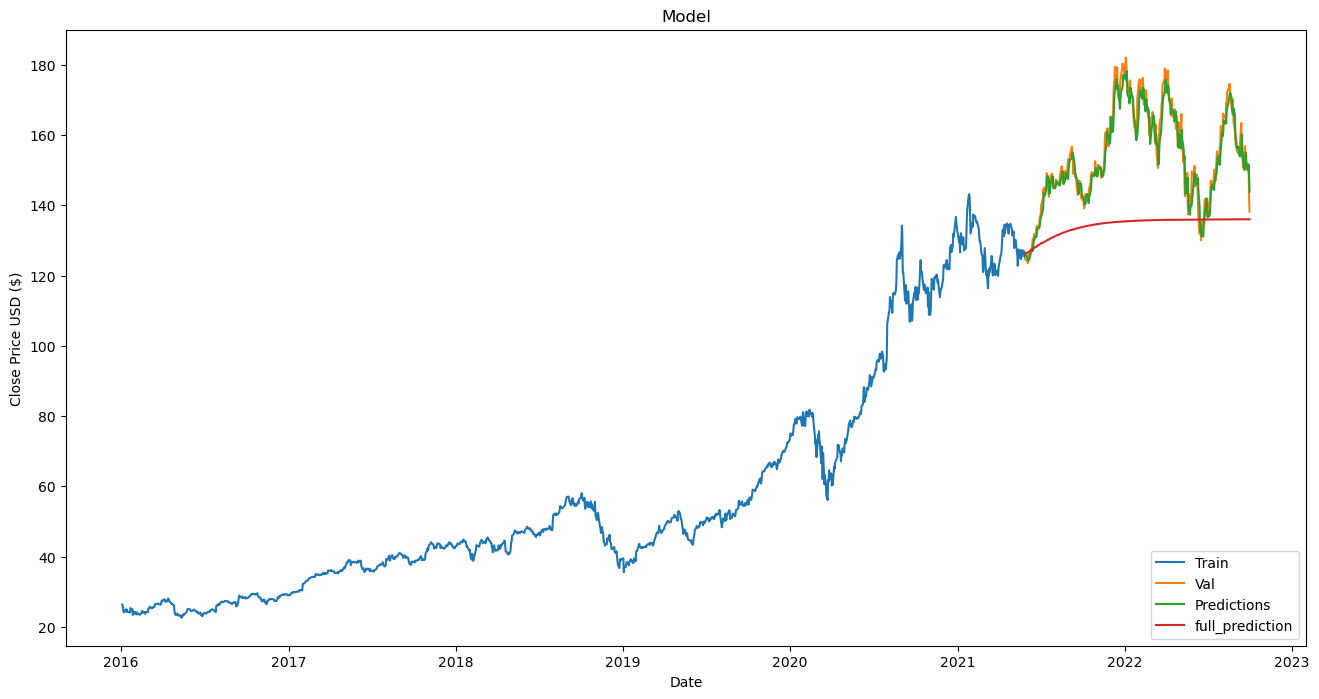

In [46]:
from matplotlib import pyplot as plt
# stock_data = yf.download('AAPL', start='2016-01-01', end='2021-10-01')

feature = 0
dic = {0:"Close", 1:"Open", 2:"High", 3:"Low"}
data1 = stock_data.filter([dic[feature]])
train = data1[:train_len]
validation = data1[train_len:]
validation['full_prediction'] = full_prediction[:,feature] 
validation['Predictions'] = predictions[:,feature]
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')
plt.ylabel('Close Price USD ($)')
plt.plot(train)
plt.plot(validation[[dic[feature], 'Predictions','full_prediction']])
plt.legend(['Train', 'Val', 'Predictions', 'full_prediction'], loc='lower right')
plt.show()